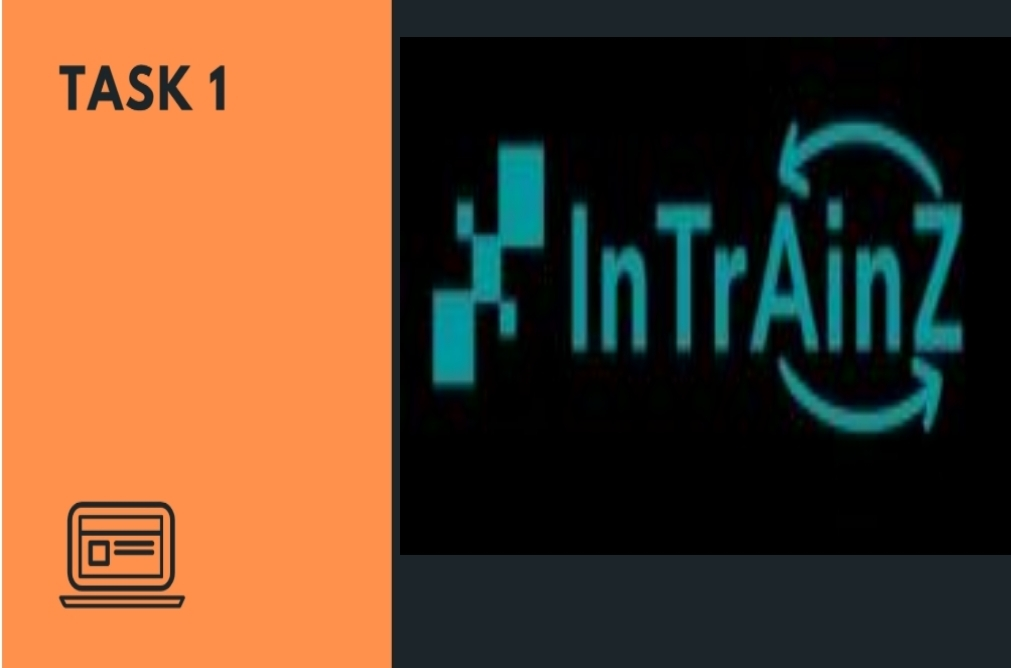

## Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy as sp
from tabulate import tabulate
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from seaborn import heatmap
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score as ras
from sklearn.ensemble import RandomForestClassifier

In [15]:
# warnings library is used to ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Introduction

Online payment is the most popular transaction method in the world today. However, with an increase in online payments also comes a rise in payment fraud. The objective of this study is **to identify fraudulent and non-fraudulent payments**. The dataset is collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

The dataset consists of 10 variables:

- **step**: represents a unit of time where 1 step equals 1 hour
- **type**: type of online transaction
- **amount**: the amount of the transaction
- **nameOrig**: customer starting the transaction
- **oldbalanceOrg**: balance before the transaction
- **newbalanceOrig**: balance after the transaction
- **nameDest**: recipient of the transaction
- **oldbalanceDest**: initial balance of recipient before the transaction
- **newbalanceDest**: the new balance of recipient after the transaction
- **isFraud**: fraud transaction
    
Dataset link---https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

## Reading /Importing the dataset

In [16]:
df = pd.read_csv('online_payments.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
df = pd.read_csv('online_payments.csv')
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2806330,225,CASH_OUT,405064.57,C165091934,31420.00,0.00,C1078240250,281257.62,686322.19,0,0
237664,14,CASH_OUT,98756.70,C628644086,0.00,0.00,C1296266953,1575463.97,1891420.88,0,0
3174381,238,CASH_OUT,72874.05,C1267133562,421726.00,348851.95,C198963200,0.00,72874.05,0,0
1481303,141,CASH_OUT,241494.34,C2114659211,81184.00,0.00,C1798537758,0.00,241494.34,0,0
2532772,205,CASH_IN,158715.38,C1172562535,4896837.88,5055553.27,C235461768,3033306.76,2874591.38,0,0


## Exploratory Data Analysis(EDA)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [20]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


## Data Pre-Processing

In [35]:
# Check duplicate values
df.duplicated().sum()

0

- There are no duplicate values.

In [23]:
print(df.isnull().sum())

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
closest_to_mean      0
closest_to_mode      0
closest_to_median    0
dtype: int64


In [21]:
mean = df['amount'].mean()
mode = df['amount'].mode().values[0]
median = df['amount'].median()

print('Mean:', mean)
print('Mode:', mode)
print('Median:', median)

Mean: 179861.90354913071
Mode: 10000000.0
Median: 74871.94


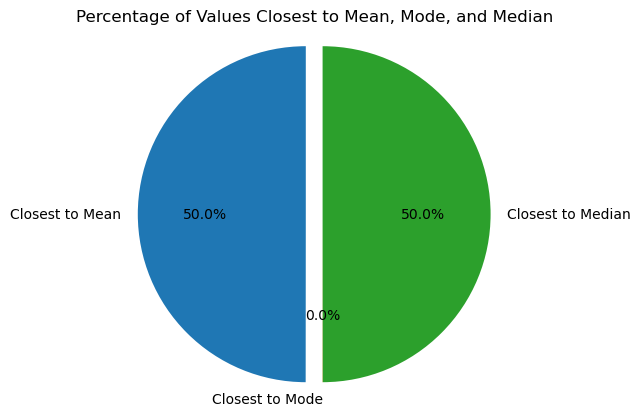

In [22]:
# calculate the percentage of values that are closest to mean, mode, and median
df['closest_to_mean'] = abs(df['amount'] - mean) <= abs(df['amount'] - mode)
df['closest_to_mode'] = df['amount'] == mode
df['closest_to_median'] = abs(df['amount'] - median) <= abs(df['amount'] - mode)

# calculate the percentage of values that are closest to mean, mode, and median with respect to all values in the column
percentage_closest_to_mean = round((df['closest_to_mean'].sum() / df['amount'].count()) * 100, 2)
percentage_closest_to_mode = round((df['closest_to_mode'].sum() / df['amount'].count()) * 100, 2)
percentage_closest_to_median = round((df['closest_to_median'].sum() / df['amount'].count()) * 100, 2)

# create a pie chart showing the percentage of values that are closest to mean, mode, and median with respect to all values in the column
labels = ['Closest to Mean', 'Closest to Mode', 'Closest to Median']
sizes = [percentage_closest_to_mean, percentage_closest_to_mode, percentage_closest_to_median]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Values Closest to Mean, Mode, and Median')
plt.show()

In [24]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


## Data Visualization & Plotting

In [25]:
# Exploring transaction type
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


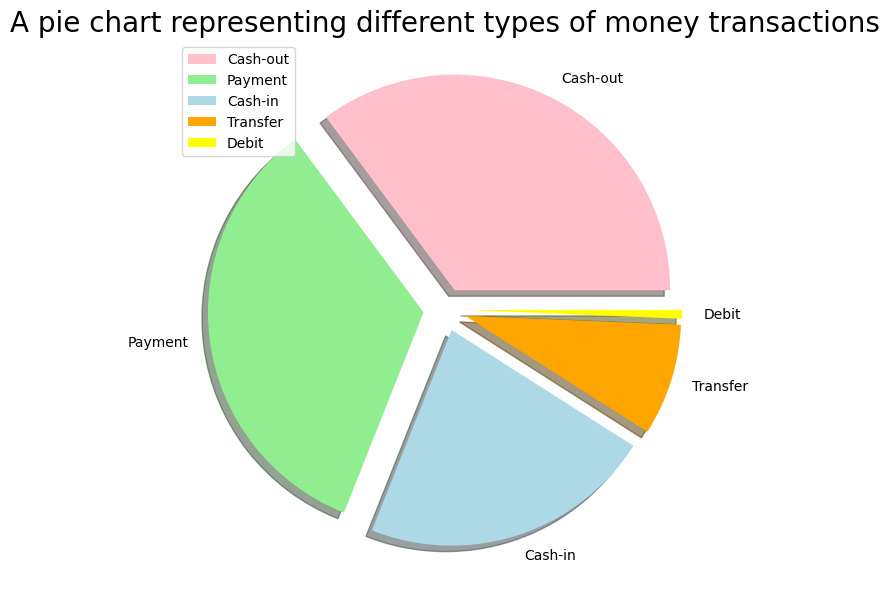

In [26]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [27]:
# checking the different types of steps involved in transactions

x = df['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 428


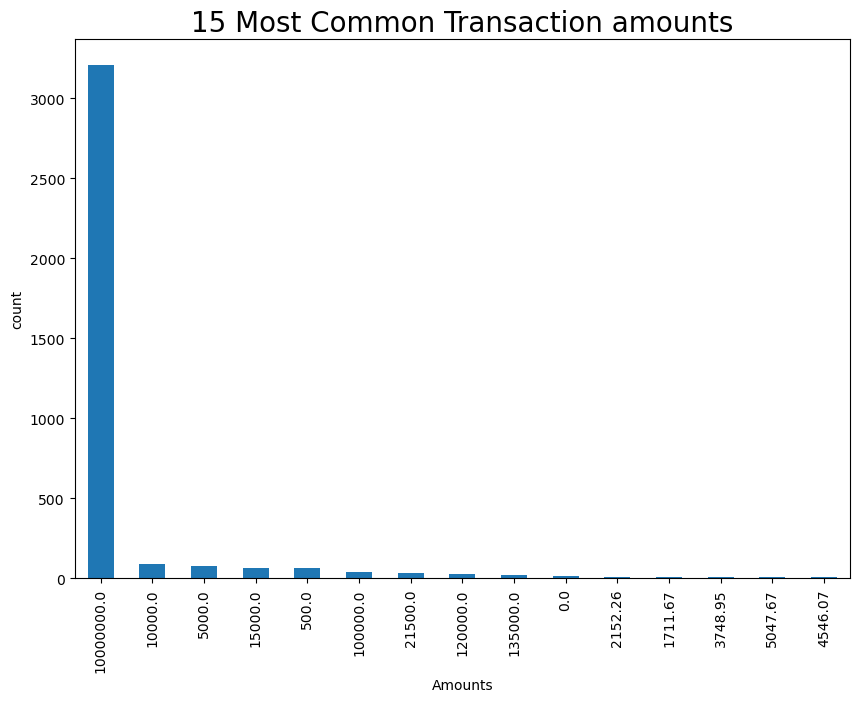

In [28]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

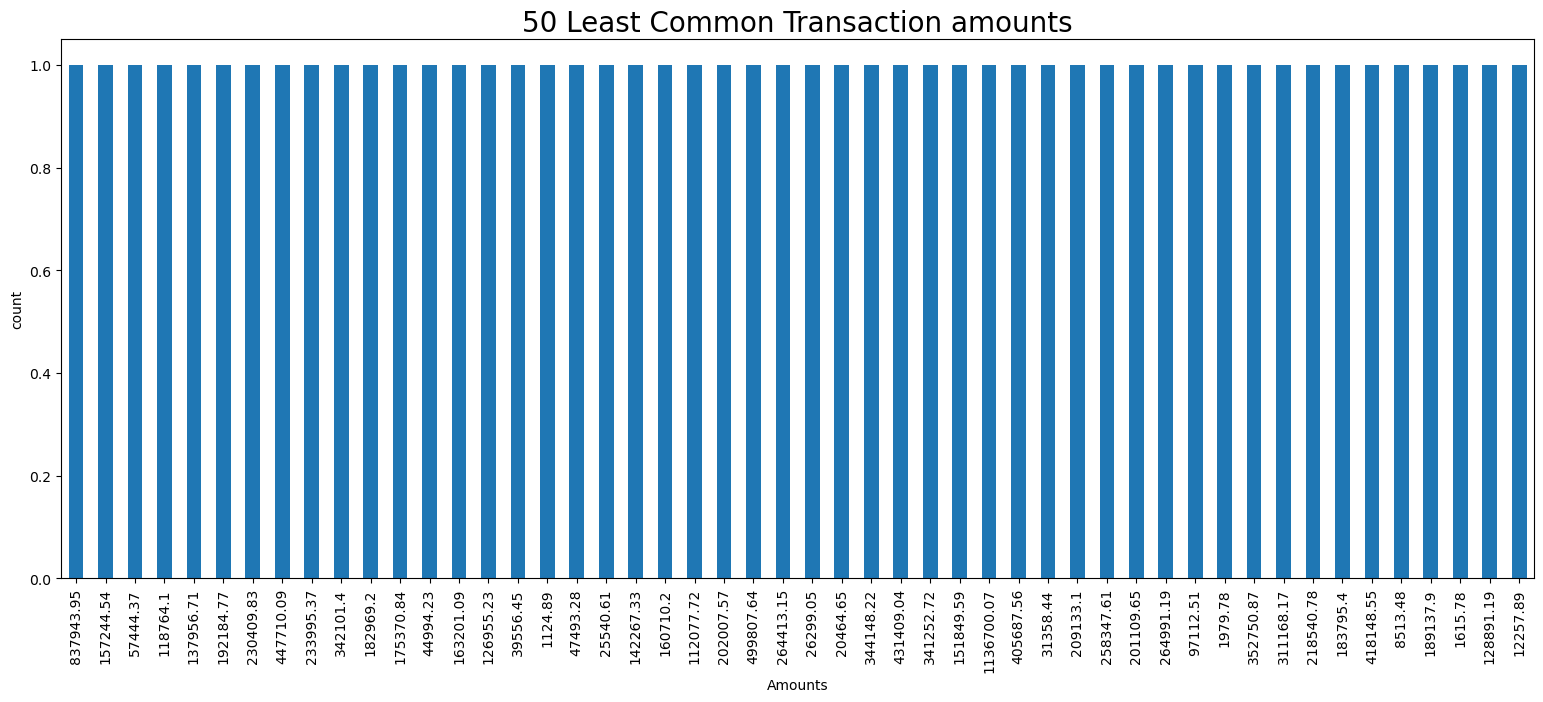

In [29]:
# checking the different values of amounts transactioned

plt.rcParams['figure.figsize'] = (19, 7)

df['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()   

In [30]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)) )
     

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [31]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [32]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [33]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [34]:
# figuring out the no. of flagged fraudulent transactions
FlaggedFraud = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [36]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

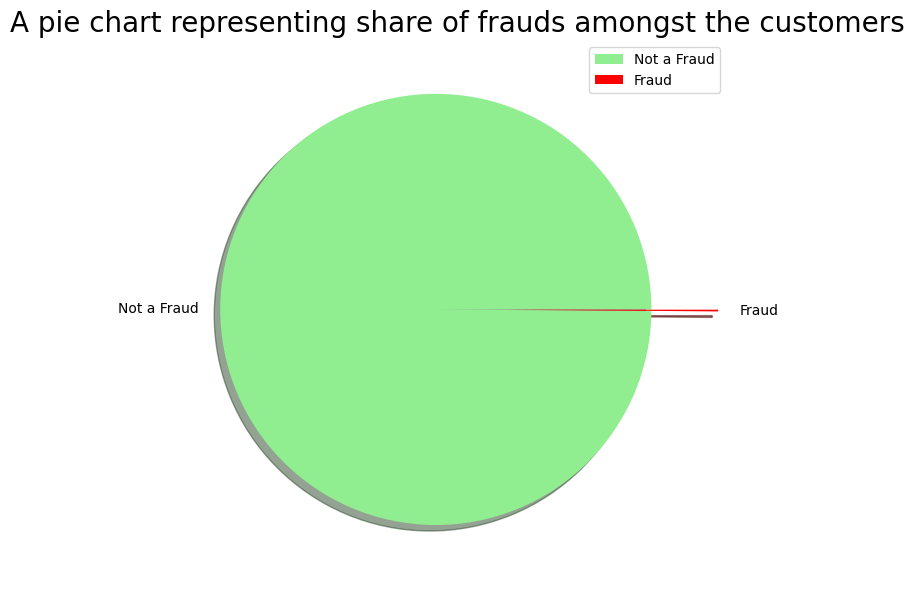

In [37]:
labels = ['Not a Fraud', 'Fraud']
colors = ['lightgreen', 'red']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()
     

In [38]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,True,False,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,True,False,True
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,True,False,True
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,True,False,True
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,True,False,True
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,False,False,False
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,False,False,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,True,False,True


In [39]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

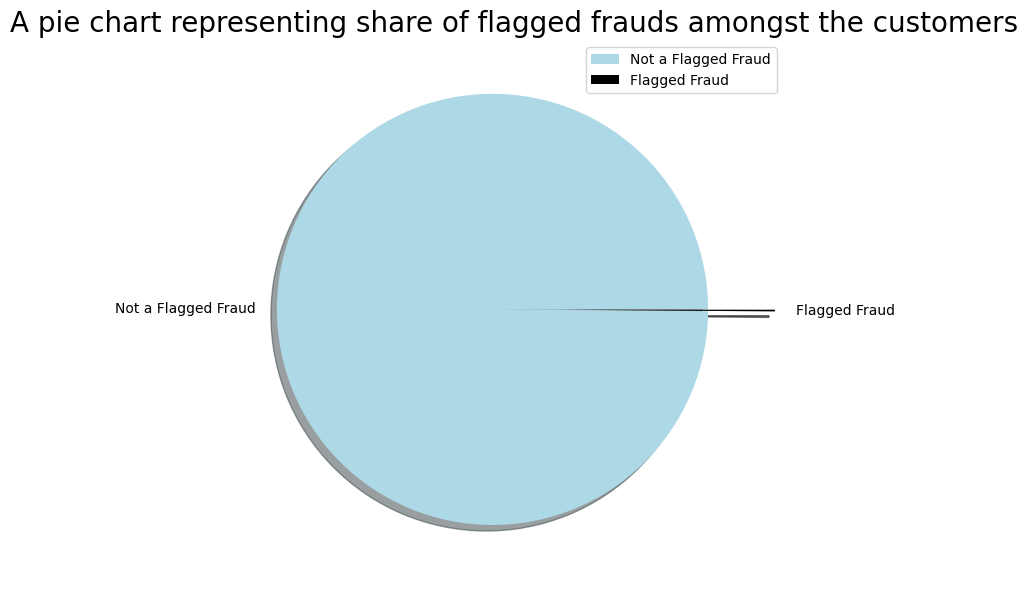

In [40]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

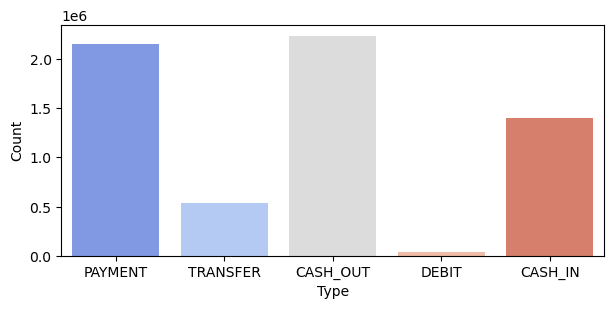

In [41]:
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='type', ylabel='amount'>

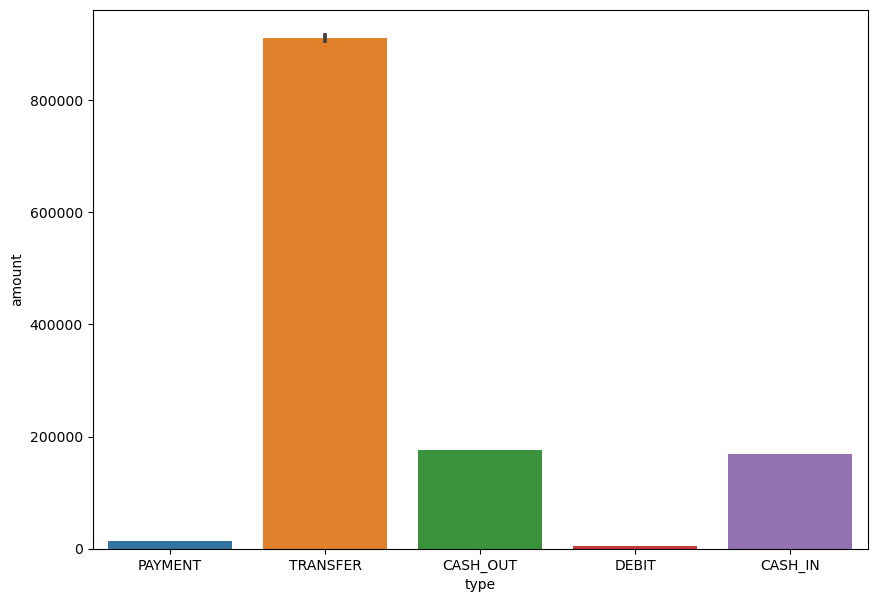

In [42]:
sns.barplot(x='type', y='amount', data=df)

In [43]:
df = pd.read_csv('online_payments.csv')
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, values=quantity, names=transactions,hole = 0.5, title="Distribution of Transaction Type")
figure.show()

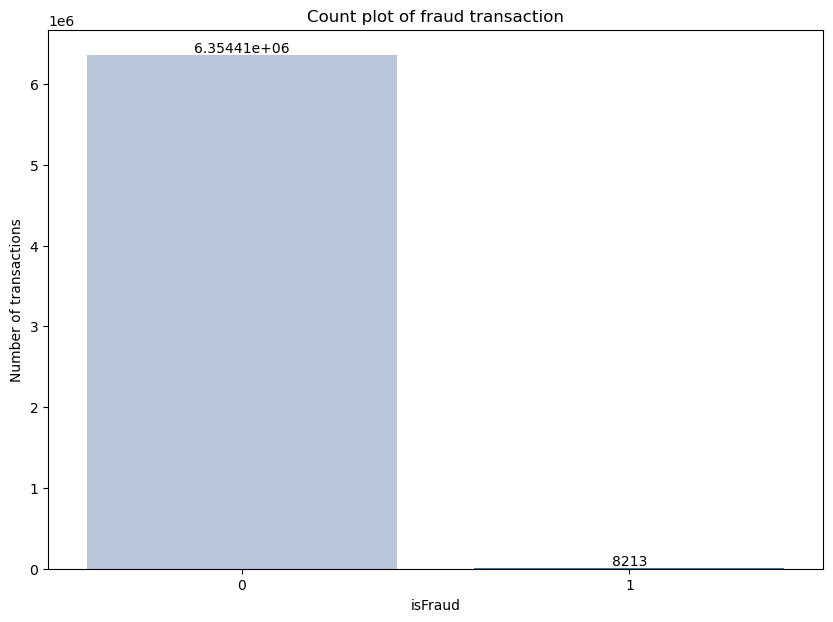

In [44]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

- There are much **more non-fraudulent transactions** than fraudulent transactions.

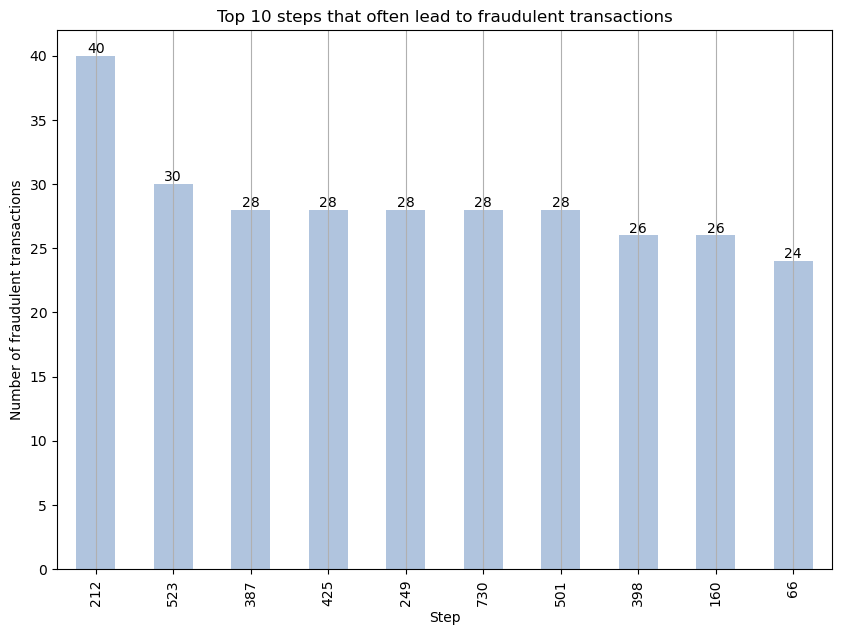

In [45]:
daf1 = df[df['isFraud']==1]
daf2 = daf1['step'].value_counts().head(10)
ax = daf2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, daf2

- **Step 212** has the highest number of fraudulent transactions, 40 cases.
- This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.

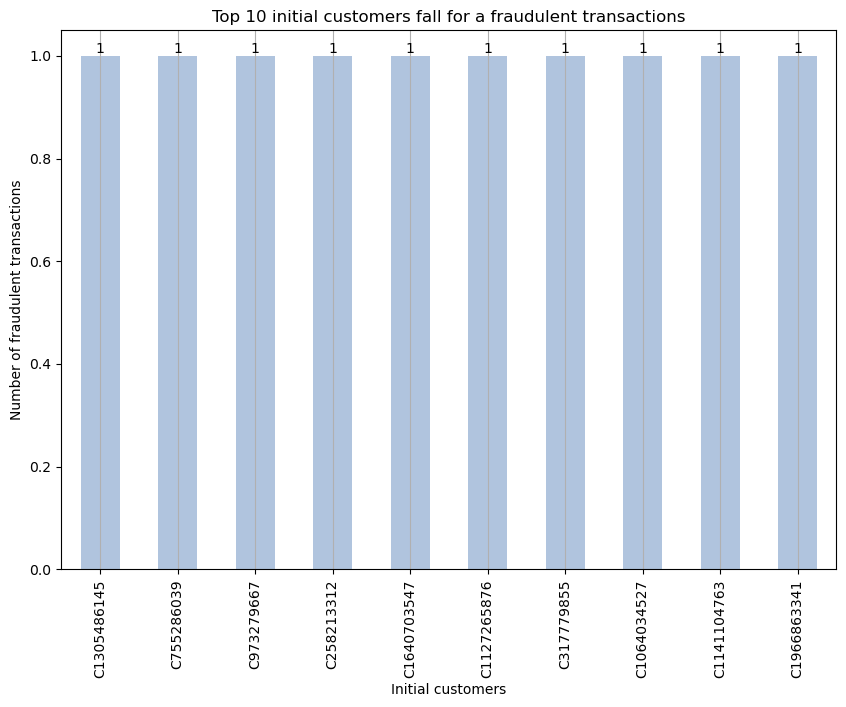

In [71]:
daf2 = daf1['nameOrig'].value_counts().head(10)
ax = daf2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, daf2

- Initial customers are scammed of **at most one** for a fraudulent transaction.

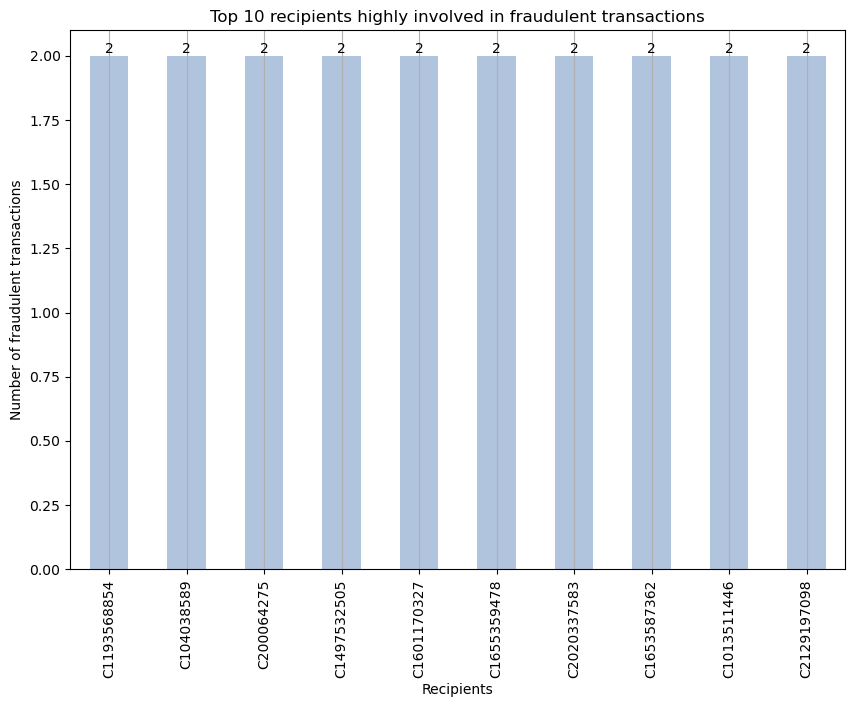

In [46]:
daf2 = daf1['nameDest'].value_counts().head(10)
ax = daf2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, daf2

- Suspicious recipients only have a **maximum of 2** involved fraudulent transactions.

<Axes: xlabel='step', ylabel='Density'>

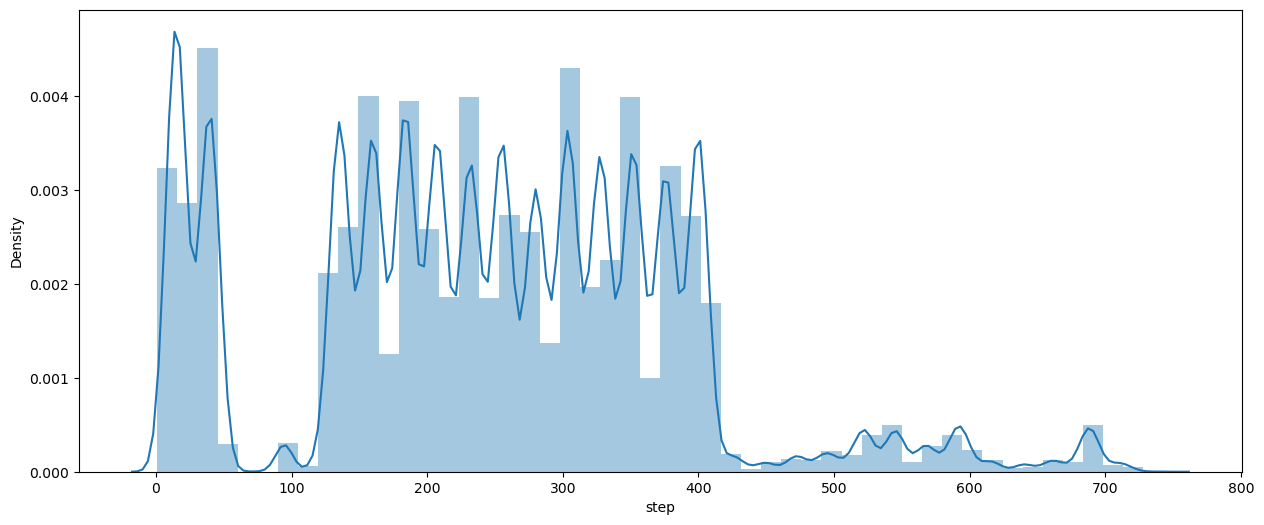

In [47]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

## Correlation of all features

In [49]:
# Checking correlation

correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


<Axes: >

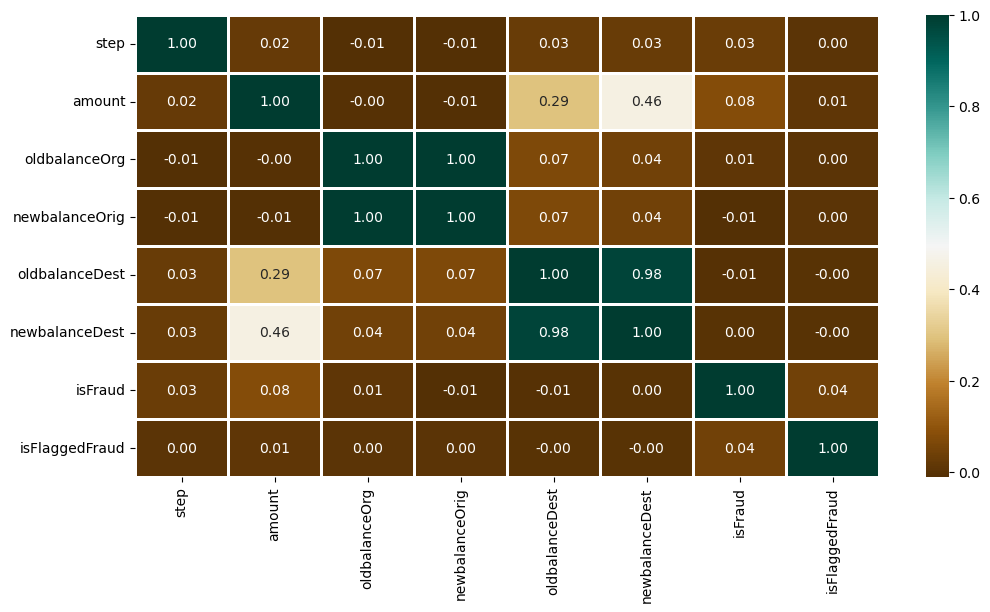

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

## One-hot Encoding

In [50]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [51]:
type_1= pd.get_dummies(df['type'], drop_first=True)
df1 = pd.concat([df, type_1], axis=1)
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,2,3,4,5
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0,1,0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0,1,0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0,0,0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0,0,0,0,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0,1,0,0,0


## Splitting the dataset

In [52]:
#We have to classify the data, creating a classification model.
#This model will have fraud and non-fraud transactions.
#For this, let's split the data into training and test sets:

# splitting the data
X = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [53]:
X.shape, y.shape

((6362620, 4), (6362620, 1))

## Training and Testing

In [54]:
# training a machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (4453834, 4)
y_train shape: (4453834, 1)


In [56]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1908786, 4)
y_test shape: (1908786, 1)


## Applying the Decision-tree Classifier

In [57]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9996835685089894


## Metrics

In [62]:
viv=model.predict(X_test)

In [67]:
accuracy_score(y_test,viv)

0.9996835685089894

- The above model is **99.96%** accurate.

## Prediction

In [58]:
# prediction
#characteristics= [type, amount, oldbalanceOrg, newbalanceOrig]
characteristics = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(characteristics))

['Fraud']


In [59]:
features = np.array([[4, 9000.60, 9000.60, 44.87]])
print(model.predict(features))

['No Fraud']
